In [1]:
import sys
sys.path.insert(0,"../")
import torchvision.transforms as transforms
from utils.dataloader import UNETDataset
from torch.utils.data import DataLoader
from tqdm import tqdm
from albumentations import HorizontalFlip, VerticalFlip, Rotate
import cv2


def load_data(batch_size, shuffle=True):
    
    train_features = UNETDataset("../train_unet/Unet_train.csv","../../train_unet/",transform=False)
    train_loader = DataLoader(train_features, batch_size=batch_size, shuffle=shuffle)
    
    val_dataset = UNETDataset("../train_unet/Unet_val.csv","../../train_unet/",transform=False)
    val_loader = DataLoader(val_dataset,batch_size=batch_size, shuffle=False)
    
    
    return train_loader, val_loader 

def augment_data(images, masks, augment=True):
    size = (512,512)
    
    for x, y in tqdm(zip(images, masks), total=len(images)):
            
            x = cv2.imread(x, cv2.IMREAD_COLOR)
            y = cv2.imread(y, cv2.IMREAD_COLOR)
            
            if augment == True:
                aug = HorizontalFlip(p=1.0)
                augmented = aug(image=x, mask=y)
                x1 = augmented["image"]
                y1 = augmented["mask"]
                
                aug = VerticalFlip(p=1.0)
                augmented = aug(image=x, mask=y)
                x2 = augmented["image"]
                y2 = augmented["mask"]
                
                aug = Rotate(limit=45, p=1.0)
                augmented = aug(image=x, mask=y)
                x3 = augmented["image"]
                y3 = augmented["mask"]
                
                
                X = [x, x1, x2, x3]
                Y = [y, y1, y2, y3]
    
    return X, Y

    
             
    

In [1]:
import sys
sys.path.insert(0,"../")
from utils.dataloader import UNETDataset
from torch.utils.data import DataLoader
from utils.transformations import CustomTransformationResUnet
from utils.createCSV import unetCSV

In [4]:
unetCSV("../test/","../test/masks/",json_path=None,output_path="./")

In [2]:
unet_Dataset = UNETDataset("./Unet_train.csv",CustomTransformationResUnet(512))
dataloader = DataLoader(unet_Dataset)

In [3]:
from matplotlib import pyplot as plt
import torch

for image,y in dataloader:
    img = image[0].permute(1,2,0).type(torch.uint8)
    

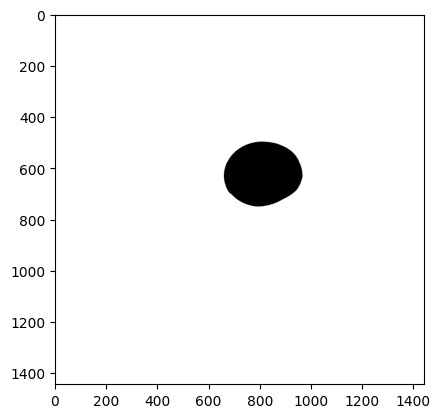

In [31]:
import cv2
x = cv2.imread("../test/masks/H0003.bmp")
# x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
plt.imshow(x)